In [1]:
import pandas as pd
import numpy as np

file1 = pd.read_csv('data/msn_02_fuel_leak_signals_preprocessed.csv', sep=';')
file2 = pd.read_csv('data/msn_10_fuel_leak_signals_preprocessed.csv', sep=';')
file3 = pd.read_csv('data/msn_11_fuel_leak_signals_preprocessed.csv', sep=';')
file4 = pd.read_csv('data/msn_12_fuel_leak_signals_preprocessed.csv', sep=';')
file5 = pd.read_csv('data/msn_14_fuel_leak_signals_preprocessed.csv', sep=';')
file6 = pd.read_csv('data/msn_29_fuel_leak_signals_preprocessed.csv', sep=';')
file7 = pd.read_csv('data/msn_37_fuel_leak_signals_preprocessed.csv', sep=';')
file8 = pd.read_csv('data/msn_53_fuel_leak_signals_preprocessed.csv', sep=';')

In [2]:
#combine all files into one file
combined = pd.concat([file2, file3, file4, file5, file6, file7, file8])

In [5]:
combined = combined[combined['FLIGHT_PHASE_COUNT'] == 8]

In [40]:
combined.dtypes

UTC_TIME               object
FUEL_USED_2           float64
FUEL_USED_3           float64
FUEL_USED_4           float64
FW_GEO_ALTITUDE       float64
VALUE_FOB             float64
VALUE_FUEL_QTY_CT     float64
VALUE_FUEL_QTY_FT1    float64
VALUE_FUEL_QTY_FT2    float64
VALUE_FUEL_QTY_FT3    float64
VALUE_FUEL_QTY_FT4    float64
VALUE_FUEL_QTY_LXT    float64
VALUE_FUEL_QTY_RXT    float64
FLIGHT_PHASE_COUNT    float64
FUEL_USED_1           float64
Flight                float64
MSN                    object
dtype: object

In [3]:
combined.dropna(inplace=True)

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376554 entries, 1489633 to 3017982
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UTC_TIME            376554 non-null  object 
 1   FUEL_USED_2         376554 non-null  float64
 2   FUEL_USED_3         376554 non-null  float64
 3   FUEL_USED_4         376554 non-null  float64
 4   FW_GEO_ALTITUDE     376554 non-null  float64
 5   VALUE_FOB           376554 non-null  float64
 6   VALUE_FUEL_QTY_CT   376554 non-null  float64
 7   VALUE_FUEL_QTY_FT1  376554 non-null  float64
 8   VALUE_FUEL_QTY_FT2  376554 non-null  float64
 9   VALUE_FUEL_QTY_FT3  376554 non-null  float64
 10  VALUE_FUEL_QTY_FT4  376554 non-null  float64
 11  VALUE_FUEL_QTY_LXT  376554 non-null  float64
 12  VALUE_FUEL_QTY_RXT  376554 non-null  float64
 13  FLIGHT_PHASE_COUNT  376554 non-null  float64
 14  FUEL_USED_1         376554 non-null  float64
 15  Flight              376554 

In [42]:
#create new column called total_fuel_used which is FUEL_USED_1 + FUEL_USED_2 + FUEL_USED_3 + FUEL_USED_4
combined['total_fuel_used'] = combined['FUEL_USED_1'] + combined['FUEL_USED_2'] + combined['FUEL_USED_3'] + combined['FUEL_USED_4']

#calculate 2 columns called fuel_used_per_minute_FOB and fuel_used_per_minute_total_fuel_used
combined['fuel_used_per_minute_total_fuel_used_diff'] = combined['total_fuel_used'].diff()

combined['initial_FOB'] = combined.groupby('Flight')['VALUE_FOB'].transform('first')

combined['fuel_used+FOB'] = combined['total_fuel_used'] + combined['VALUE_FOB']

combined['diff_initial_FOB_fuel_used+FOB'] = combined['initial_FOB'] - combined['fuel_used+FOB']

combined['predicted_FOB'] = combined['initial_FOB'] - combined['total_fuel_used']

combined['diff_FOB'] = combined['VALUE_FOB'].diff()

combined['Real_FOB-predicted_FOB'] = combined['VALUE_FOB'] - combined['predicted_FOB']

combined['flight_entry'] = combined.groupby('Flight').cumcount()

In [70]:
combined['Flight'].unique()


array([1772.0, 1773.0, 1777.0, 1787.0, 1789.0, 1791.0, 1792.0, 1793.0,
       1798.0, 1801.0, 1808.0, 1809.0, 1817.0, 1818.0, 1821.0, 1822.0,
       1826.0, 1827.0, 1828.0, 1861.0, 1864.0, 1865.0, 1868.0, 1872.0,
       1873.0, 1874.0, 1875.0, 1878.0, 1880.0, 1882.0, 1883.0, 1898.0,
       1899.0, 1903.0, 1906.0, 1909.0, 1911.0, 1914.0, 1916.0, 1923.0,
       1932.0, 1933.0, 1937.0, 1944.0, 1962.0, 1963.0, 1966.0, 1968.0,
       1969.0, 1973.0, 1974.0, 1977.0, 1987.0, 1990.0, 1995.0, 1998.0,
       1999.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
       2014.0, 2015.0, 2016.0, 2021.0, 2022.0, 321.0, 322.0, 323.0, 324.0,
       325.0, 361.0, 363.0, 367.0, 368.0, 371.0, 373.0, 374.0, 376.0,
       377.0, 378.0, 379.0, 380.0, 381.0, 382.0, 384.0, 386.0, 387.0,
       388.0, 389.0, 391.0, 392.0, 395.0, 396.0, 397.0, 398.0, 406.0,
       407.0, 408.0, 419.0, 421.0, 422.0, 423.0, 426.0, 429.0, 430.0,
       432.0, 433.0, 437.0, 441.0, 468.0, 470.0, 473.0, 475.0, 476.0,
       

In [6]:
combined.dtypes

UTC_TIME                                      object
FUEL_USED_2                                  float64
FUEL_USED_3                                  float64
FUEL_USED_4                                  float64
FW_GEO_ALTITUDE                              float64
VALUE_FOB                                    float64
VALUE_FUEL_QTY_CT                            float64
VALUE_FUEL_QTY_FT1                           float64
VALUE_FUEL_QTY_FT2                           float64
VALUE_FUEL_QTY_FT3                           float64
VALUE_FUEL_QTY_FT4                           float64
VALUE_FUEL_QTY_LXT                           float64
VALUE_FUEL_QTY_RXT                           float64
FLIGHT_PHASE_COUNT                           float64
FUEL_USED_1                                  float64
Flight                                       float64
MSN                                           object
total_fuel_used                              float64
Fuel_On_board_tanks                          f

In [71]:
df = combined

In [72]:
df.dropna(inplace=True)

In [73]:
selected_flights_data = df[df['Flight'].isin([1772.0, 1773.0, 1777.0, 1787.0, 1789.0, 1791.0, 1792.0, 1793.0,
       1798.0, 1801.0, 1808.0, 1809.0, 1817.0, 1818.0, 1821.0, 1822.0,
       1826.0, 1827.0, 1828.0, 1861.0, 1864.0, 1865.0, 1868.0, 1872.0,
       1873.0, 1874.0, 1875.0, 1878.0, 1880.0, 1882.0, 1883.0, 1898.0,
       1899.0, 1903.0, 1906.0, 1909.0, 1911.0, 1914.0, 1916.0, 1923.0,
       1932.0, 1933.0, 1937.0, 1944.0, 1962.0, 1963.0, 1966.0, 1968.0,
       1969.0, 1973.0, 1974.0, 1977.0, 1987.0, 1990.0, 1995.0, 1998.0,
       1999.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0,
       2014.0, 2015.0, 2016.0, 2021.0, 2022.0, 321.0, 322.0, 323.0, 324.0,
       325.0, 361.0, 363.0, 367.0, 368.0, 371.0, 373.0, 374.0, 376.0,
       377.0, 378.0, 379.0, 380.0, 381.0, 382.0, 384.0, 386.0, 387.0,
       388.0, 389.0, 391.0, 392.0, 395.0, 396.0, 397.0, 398.0, 406.0,
       407.0, 408.0, 419.0, 421.0, 422.0, 423.0, 426.0, 429.0, 430.0,
       432.0, 433.0, 437.0, 441.0, 468.0, 470.0, 473.0, 475.0, 476.0,
       481.0, 483.0, 485.0, 489.0, 495.0, 496.0, 497.0, 498.0, 499.0,
       500.0, 501.0, 503.0, 330.0, 331.0, 335.0, 336.0, 342.0, 343.0,
       344.0, 345.0, 348.0, 351.0, 352.0, 354.0, 357.0, 359.0, 360.0,
       362.0, 364.0, 366.0, 383.0, 390.0, 393.0, 394.0, 400.0, 404.0,
       405.0, 410.0, 411.0, 412.0, 413.0, 415.0, 418.0, 427.0, 431.0,
       434.0, 435.0, 436.0, 442.0, 443.0, 444.0, 445.0, 447.0, 448.0,
       450.0, 451.0, 452.0, 453.0, 454.0, 461.0, 462.0, 463.0, 464.0,
       465.0, 466.0, 471.0, 472.0, 474.0, 480.0, 486.0, 492.0, 502.0,
       513.0, 514.0, 515.0, 517.0, 522.0, 523.0, 524.0, 525.0, 536.0,
       537.0, 538.0, 540.0, 543.0, 546.0, 550.0, 553.0, 554.0, 566.0,
       567.0, 569.0, 572.0, 578.0, 579.0, 582.0, 584.0, 585.0, 592.0,])]


In [57]:
# Assuming 'df' and 'selected_flights_data' have the same structure and index alignment
leakage_rate = 10
leakaged_amount = 0

for i, row in selected_flights_data.iterrows():
    leakaged_amount += leakage_rate
    print(f'Row {i}, Leakaged Amount: {leakaged_amount}, Before: {selected_flights_data.loc[i, "VALUE_FOB"]}')
    selected_flights_data.loc[i, 'VALUE_FOB'] -= leakaged_amount
    print(f'After: {selected_flights_data.loc[i, "VALUE_FOB"]}')

selected_flights_data
print(selected_flights_data)

Row 2323684, Leakaged Amount: 10, Before: 32043.0
After: 32033.0
Row 2323685, Leakaged Amount: 20, Before: 32041.0
After: 32021.0
Row 2323686, Leakaged Amount: 30, Before: 32041.0
After: 32011.0
Row 2323687, Leakaged Amount: 40, Before: 32039.0
After: 31999.0
Row 2323688, Leakaged Amount: 50, Before: 32038.0
After: 31988.0
Row 2323689, Leakaged Amount: 60, Before: 32036.0
After: 31976.0
Row 2323690, Leakaged Amount: 70, Before: 32035.0
After: 31965.0
Row 2323691, Leakaged Amount: 80, Before: 32034.0
After: 31954.0
Row 2323692, Leakaged Amount: 90, Before: 32033.0
After: 31943.0
Row 2323693, Leakaged Amount: 100, Before: 32031.0
After: 31931.0
Row 2323694, Leakaged Amount: 110, Before: 32032.0
After: 31922.0
Row 2323695, Leakaged Amount: 120, Before: 32028.0
After: 31908.0
Row 2323696, Leakaged Amount: 130, Before: 32027.0
After: 31897.0
Row 2323697, Leakaged Amount: 140, Before: 32027.0
After: 31887.0
Row 2323698, Leakaged Amount: 150, Before: 32027.0
After: 31877.0
Row 2323699, Leakag

In [74]:
# Assuming 'df' and 'selected_flights_data' have the same structure and index alignment
leakage_rate = 10
leakaged_amount = 0

for i, row in selected_flights_data.iterrows():
    leakaged_amount += leakage_rate
    selected_flights_data.loc[i, 'VALUE_FOB'] -= leakaged_amount

# Display the modified DataFrame
print(selected_flights_data)
#create new column called total_fuel_used which is FUEL_USED_1 + FUEL_USED_2 + FUEL_USED_3 + FUEL_USED_4
selected_flights_data['total_fuel_used'] = selected_flights_data['FUEL_USED_1'] + selected_flights_data['FUEL_USED_2'] + selected_flights_data['FUEL_USED_3'] + selected_flights_data['FUEL_USED_4']

#calculate 2 columns called fuel_used_per_minute_FOB and fuel_used_per_minute_total_fuel_used
selected_flights_data['fuel_used_per_minute_total_fuel_used_diff'] = selected_flights_data['total_fuel_used'].diff()

selected_flights_data['initial_FOB'] = selected_flights_data.groupby('Flight')['VALUE_FOB'].transform('first')

selected_flights_data['fuel_used+FOB'] = selected_flights_data['total_fuel_used'] + selected_flights_data['VALUE_FOB']

selected_flights_data['diff_initial_FOB_fuel_used+FOB'] = selected_flights_data['initial_FOB'] - selected_flights_data['fuel_used+FOB']

selected_flights_data['predicted_FOB'] = selected_flights_data['initial_FOB'] - selected_flights_data['total_fuel_used']

selected_flights_data['diff_FOB'] = selected_flights_data['VALUE_FOB'].diff()

selected_flights_data['Real_FOB-predicted_FOB'] = selected_flights_data['VALUE_FOB'] - selected_flights_data['predicted_FOB']

selected_flights_data['flight_entry'] = selected_flights_data.groupby('Flight').cumcount()


                    UTC_TIME  FUEL_USED_2  FUEL_USED_3  FUEL_USED_4  \
2802285  2016-10-29 08:30:11    79.641632    73.209457    71.272255   
2802286  2016-10-29 08:30:12    79.764977    73.332397    71.396461   
2802287  2016-10-29 08:30:13    79.862244    73.441658    71.505798   
2802288  2016-10-29 08:30:14    79.986839    73.550957    71.629326   
2802289  2016-10-29 08:30:15    80.097038    73.659943    71.753143   
...                      ...          ...          ...          ...   
3017978  2018-04-22 11:45:41  3496.829590  3501.129639  3496.302490   
3017979  2018-04-22 11:45:42  3497.115723  3501.418457  3496.593018   
3017980  2018-04-22 11:45:43  3497.439697  3501.743896  3496.883057   
3017981  2018-04-22 11:45:44  3497.691650  3502.032959  3497.209229   
3017982  2018-04-22 11:45:45  3497.727783  3502.069336  3497.245361   

         FW_GEO_ALTITUDE  VALUE_FOB  VALUE_FUEL_QTY_CT  VALUE_FUEL_QTY_FT1  \
2802285           1785.0    24315.0                0.0              1

/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_1011/3669312554.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_flights_data['total_fuel_used'] = selected_flights_data['FUEL_USED_1'] + selected_flights_data['FUEL_USED_2'] + selected_flights_data['FUEL_USED_3'] + selected_flights_data['FUEL_USED_4']
/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_1011/3669312554.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_flights_data['fuel_used_per_minute_total_fuel_used

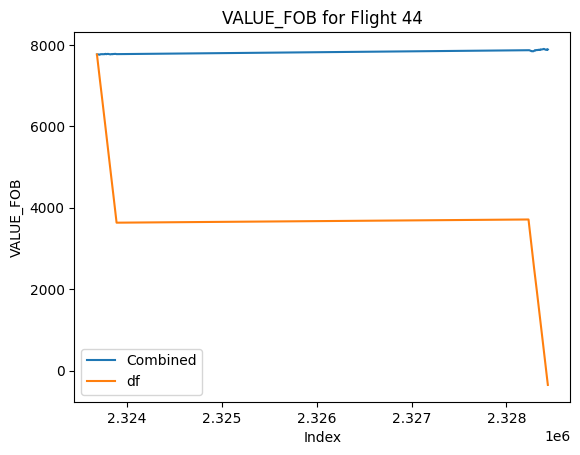

In [60]:
# Plot VALUE_FOB for flight 461 from combined dataframe
combined[combined['Flight'] == 361]['Real_FOB-predicted_FOB'].plot(kind='line', label='Combined')

# Plot VALUE_FOB for flight 461 from df dataframe
selected_flights_data[selected_flights_data['Flight'] == 361]['Real_FOB-predicted_FOB'].plot(kind='line', label='df')

plt.xlabel('Index')
plt.ylabel('VALUE_FOB')
plt.title('VALUE_FOB for Flight 44')
plt.legend()
plt.show()

In [75]:
#of the selected_fights_data dataframe i want to change the flights column to 44a, 2214a and 361a
selected_flights_data['Flight'] = selected_flights_data['Flight'].astype(str) + 'a'

#add the selected_flights_data to the combined dataframe
combined = pd.concat([combined, selected_flights_data])

/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_1011/1458089440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_flights_data['Flight'] = selected_flights_data['Flight'].astype(str) + 'a'


In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import TensorBoard
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [63]:
combined.isna().sum()

UTC_TIME                                     0
FUEL_USED_2                                  0
FUEL_USED_3                                  0
FUEL_USED_4                                  0
FW_GEO_ALTITUDE                              0
VALUE_FOB                                    0
VALUE_FUEL_QTY_CT                            0
VALUE_FUEL_QTY_FT1                           0
VALUE_FUEL_QTY_FT2                           0
VALUE_FUEL_QTY_FT3                           0
VALUE_FUEL_QTY_FT4                           0
VALUE_FUEL_QTY_LXT                           0
VALUE_FUEL_QTY_RXT                           0
FLIGHT_PHASE_COUNT                           0
FUEL_USED_1                                  0
Flight                                       0
MSN                                          0
total_fuel_used                              0
fuel_used_per_minute_total_fuel_used_diff    1
initial_FOB                                  0
fuel_used+FOB                                0
diff_initial_

In [76]:
#creating a new column called leak which is 1 if there is a leak and 0 if there is no leak identified by if the flight name has an 'a' in it
combined['leak'] = combined['Flight'].apply(lambda x: 1 if isinstance(x, str) and 'a' in x else 0)


/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_1011/1508357980.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(combined['leak'], sort = True)


Text(0, 0.5, 'Frequency')

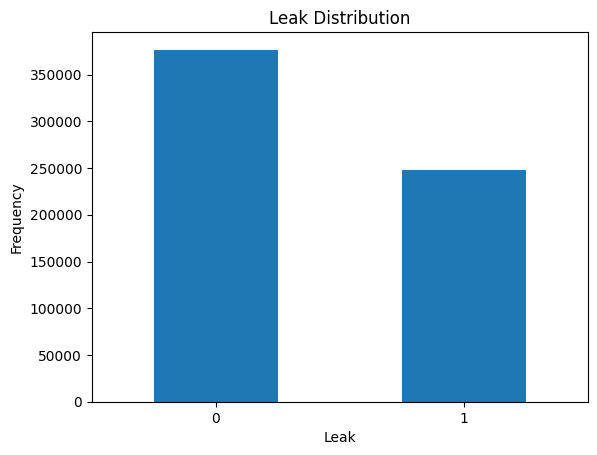

In [96]:
count_classes = pd.value_counts(combined['leak'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Leak Distribution")
plt.xlabel("Leak")
plt.ylabel("Frequency")

In [78]:
combined['UTC_TIME']

2802285    2016-10-29 08:30:11
2802286    2016-10-29 08:30:12
2802287    2016-10-29 08:30:13
2802288    2016-10-29 08:30:14
2802289    2016-10-29 08:30:15
                  ...         
3017978    2018-04-22 11:45:41
3017979    2018-04-22 11:45:42
3017980    2018-04-22 11:45:43
3017981    2018-04-22 11:45:44
3017982    2018-04-22 11:45:45
Name: UTC_TIME, Length: 624824, dtype: object

In [82]:
# Select a split point
split_date = '2018-02-01'  # Example split date

# Split the data into train and test sets
train_df = combined[combined['UTC_TIME'] < split_date]
test_df = combined[combined['UTC_TIME'] >= split_date]

# Display the shapes of the resulting dataframes
print(f'Training data shape: {train_df.shape}')
print(f'Testing data shape: {test_df.shape}')

Training data shape: (461492, 27)
Testing data shape: (163332, 27)


In [84]:
# Prepare the data for the autoencoder
scaler = StandardScaler()

# Use only the 'VALUE_FOB' column for training
train_x = scaler.fit_transform(train_df[['Real_FOB-predicted_FOB']])
test_x = scaler.transform(test_df[['Real_FOB-predicted_FOB']])

# Ensure the input dimension is set correctly
input_dim = train_x.shape[1]

# Build the autoencoder model
encoding_dim = 12  # Example encoding dimension

inputArray = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='tanh')(inputArray)
decoded = Dense(input_dim, activation='softmax')(encoded)

autoencoder = Model(inputArray, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

# Train the autoencoder
autoencoder.fit(train_x, train_x, epochs=50, batch_size=10, shuffle=False, validation_data=(test_x, test_x))

# Evaluate the autoencoder on test data
reconstructed_test = autoencoder.predict(test_x)
loss = np.mean(np.square(test_x - reconstructed_test), axis=1)

# Print some results
print(f'Mean Squared Error on test data: {np.mean(loss)}')

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
    1/46150 ━━━━━━━━━━━━━━━━━━━━ 2:41:11 210ms/step - loss: 0.9676

/Users/constantinwiederin/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


46150/46150 ━━━━━━━━━━━━━━━━━━━━ 13s 268us/step - loss: 1.9977 - val_loss: 9.7256
Epoch 2/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 265us/step - loss: 2.0063 - val_loss: 9.7256
Epoch 3/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 266us/step - loss: 1.9979 - val_loss: 9.7256
Epoch 4/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 265us/step - loss: 1.9945 - val_loss: 9.7256
Epoch 5/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 267us/step - loss: 1.9989 - val_loss: 9.7256
Epoch 6/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 266us/step - loss: 2.0001 - val_loss: 9.7256
Epoch 7/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 266us/step - loss: 2.0099 - val_loss: 9.7256
Epoch 8/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 265us/step - loss: 1.9920 - val_loss: 9.7256
Epoch 9/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 265us/step - loss: 1.9875 - val_loss: 9.7256
Epoch 10/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 264us/step - loss: 2.0014 - val_loss: 9.7256
Epoch 11/50
46150/46150 ━━━━━━━━━━━━━━━━━━━━ 12s 267us/step - loss: 2.0089 - val

/Users/constantinwiederin/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5105/5105 ━━━━━━━━━━━━━━━━━━━━ 1s 190us/step
Mean Squared Error on test data: 9.725625488149738


In [88]:
import tensorflow as tf
from tensorflow.keras import layers

class AnomalyDetector(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(80, activation="relu"),
            layers.Dense(70, activation="relu"),
            layers.Dense(60, activation="relu"),                                  
            layers.Dense(50, activation="relu"),
            layers.Dense(40, activation="relu"),
            layers.Dense(30, activation="relu"),
            layers.Dense(20, activation="relu")
        ])
        
        self.decoder = tf.keras.Sequential([ 
            layers.Dense(20, activation="relu"),                                 
            layers.Dense(30, activation="relu"),
            layers.Dense(40, activation="relu"),
            layers.Dense(50, activation="relu"),
            layers.Dense(60, activation="relu"),
            layers.Dense(70, activation="relu"),
            layers.Dense(80, activation="relu"),
            layers.Dense(10, activation="sigmoid")
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()


In [89]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss= 'mse')

In [90]:
history = autoencoder.fit(train_x, train_x, 
          epochs=300, 
          batch_size=100,
          validation_data=(test_x, test_x),
          shuffle=True)

Epoch 1/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 5s 940us/step - loss: 0.8804 - val_loss: 6.1445
Epoch 2/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 940us/step - loss: 0.8700 - val_loss: 6.1445
Epoch 3/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 934us/step - loss: 0.8680 - val_loss: 6.1445
Epoch 4/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 916us/step - loss: 0.8720 - val_loss: 6.1445
Epoch 5/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 933us/step - loss: 0.8699 - val_loss: 6.1445
Epoch 6/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 914us/step - loss: 0.8690 - val_loss: 6.1445
Epoch 7/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 910us/step - loss: 0.8644 - val_loss: 6.1445
Epoch 8/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 941us/step - loss: 0.8722 - val_loss: 6.1445
Epoch 9/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 927us/step - loss: 0.8654 - val_loss: 6.1445
Epoch 10/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 944us/step - loss: 0.8628 - val_loss: 6.1445
Epoch 11/300
4615/4615 ━━━━━━━━━━━━━━━━━━━━ 4s 961us/step - loss: 0.8758 - val_loss: 6.14

In [92]:
#score my model
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_df['leak']})

error_df.describe()


5105/5105 ━━━━━━━━━━━━━━━━━━━━ 2s 298us/step


,Reconstruction_error,True_class
count,1.633320e+05,163332.000000
mean,6.144463e+00,0.420156
std,1.023442e+01,0.493585
min,9.368569e-09,0.000000
25%,5.894517e-08,0.000000
50%,8.060868e-08,0.000000
75%,1.164377e+01,1.000000
max,1.033660e+02,1.000000


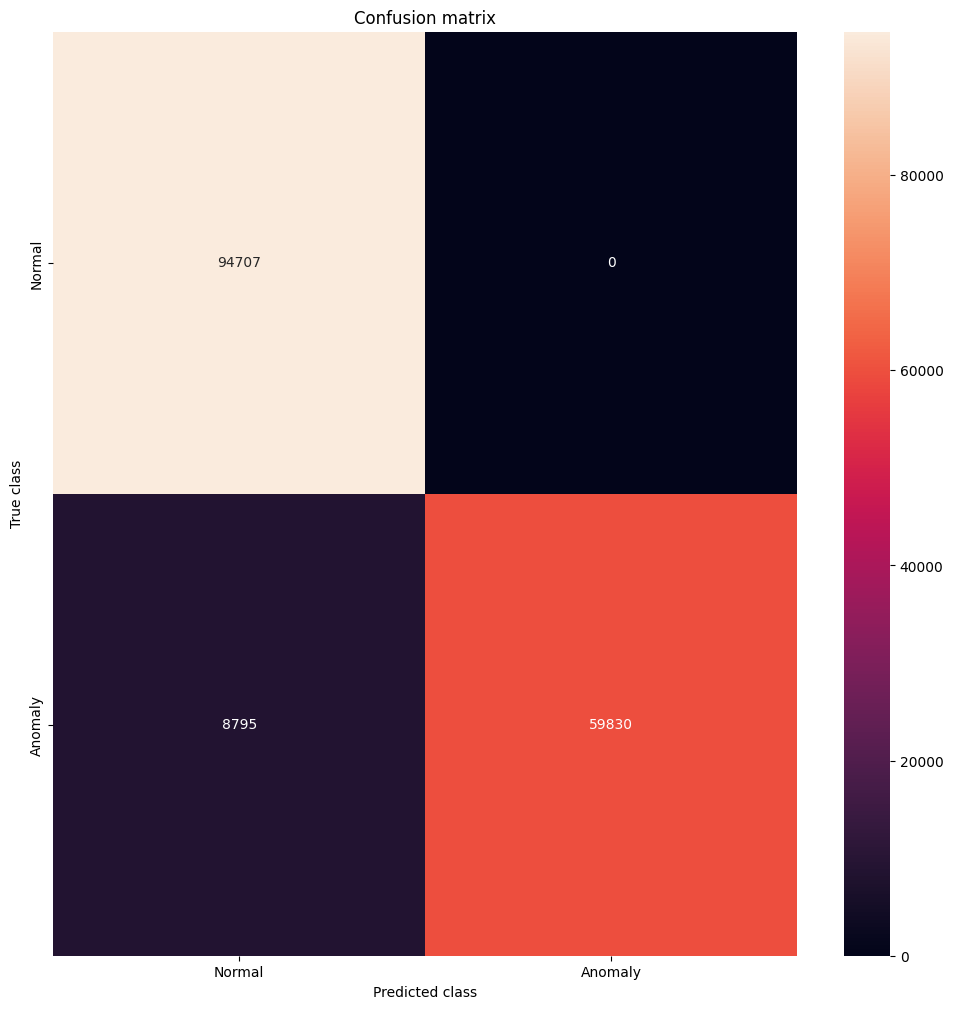

In [94]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
threshold_fixed = 0.05
y_pred = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'], annot=True, fmt="d");
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



In [95]:
#save the model
autoencoder.save('autoencoder_model.h5')

